# Bagging and Boosting over Decision Trees

### Outline <a name = 'outline'></a>
* [Data generation](#data) 
* [Decision tree](#tree) 
* [Random forest](#rf)
* [Gradient Boosting](#gb)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn import tree, ensemble, model_selection

from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [5]:
%matplotlib inline

## Data <a name = 'data'></a>

Problem statement at kaggle: https://www.kaggle.com/c/bioresponse

Data: https://www.kaggle.com/c/bioresponse/data we use train.csv

Based on a given characteristics of the molecule, it is required to determine whether a biological response will be given

Features are normalised

In [6]:
bioresponse = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [7]:
bioresponse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [8]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [10]:
bioresponse.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
bioresponse.Activity.value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

In [12]:
bioresponse_target = bioresponse.Activity.values

In [13]:
bioresponse_data = bioresponse.iloc[:, 1:]

[back to outline](#outline)

## Decision tree classifier <a name = 'tree'></a>

In [14]:
tree_model = tree.DecisionTreeClassifier(min_samples_split = 10)

In [15]:
tree_scoring = model_selection.cross_val_score(tree_model, 
                                                bioresponse_data, 
                                                bioresponse_target, 
                                                scoring = 'accuracy', 
                                                cv = 5)

In [16]:
np.mean(tree_scoring)

0.7272735019973368

[back to outline](#outline)

## Random forest <a name = 'rf'></a>

In [21]:
?ensemble.RandomForestClassifier

In [18]:
rf_model = ensemble.RandomForestClassifier(n_estimators = 10, min_samples_split = 10, 
                                           n_jobs = -1, random_state = 1)

In [19]:
rf_scoring = model_selection.cross_val_score(rf_model,
                                             bioresponse_data, 
                                             bioresponse_target,
                                             scoring = 'accuracy',
                                             cv = 5)

In [20]:
np.mean(rf_scoring)

0.768057168220151

### How many trees do we need? 

In [22]:
n_trees = [1] + list(range(10, 75, 5))

In [23]:
n_trees

[1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

In [24]:
rf_scoring = []
for n_tree in n_trees:
    model = ensemble.RandomForestClassifier(n_estimators = n_tree, 
                                            min_samples_split = 10, 
                                            random_state = 1)
    
    score = model_selection.cross_val_score(model,
                                            bioresponse_data,
                                            bioresponse_target,
                                            scoring = 'accuracy',
                                            cv = 3)
    
    rf_scoring.append(score)
    
rf_scoring = np.asmatrix(rf_scoring)

In [25]:
rf_scoring = np.asmatrix(rf_scoring)

In [26]:
np.max(rf_scoring.mean(axis = 1))

0.7867250732747135

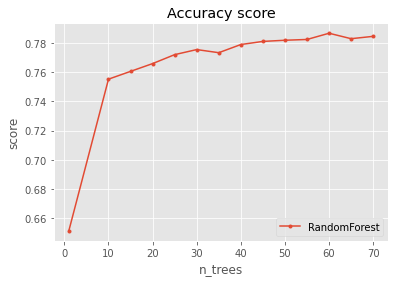

In [27]:
plt.plot(n_trees, rf_scoring.mean(axis = 1), marker='.', label='RandomForest')
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Accuracy score')
plt.legend(loc = 'lower right')

### Do we have enough data to train model? 
**Learning curves**

In [28]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_model, 
                                                                        bioresponse_data, 
                                                                        bioresponse_target,
                                                                        train_sizes = np.arange(0.1,1., 0.2),
                                                                        cv = 3, 
                                                                        scoring = 'accuracy')

In [29]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.95333333 0.94311111 0.9512     0.95866667 0.95362963]
[0.64169102 0.69980943 0.71768036 0.74433211 0.75366224]


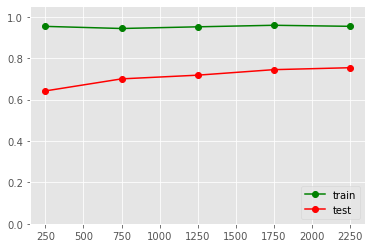

In [30]:
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

[back to outline](#outline)

## Gradient Boosting <a name = 'gb'></a>

In [41]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 50, eval_metric='logloss') 

In [42]:
xgb_scoring = model_selection.cross_val_score(xgb_model,
                                             bioresponse_data, 
                                             bioresponse_target,
                                             scoring = 'accuracy',
                                             cv = 3)

In [43]:
np.mean(xgb_scoring)

0.7861883293365307

### Again, how many trees do we need? 

In [44]:
n_trees = [1] + list(range(10, 75, 5))

In [47]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    model = xgb.XGBClassifier(
        learning_rate = 0.1, 
        max_depth = 5, 
        n_estimators = n_tree, 
        eval_metric='logloss',
        min_child_weight = 3
    )
    
    score = model_selection.cross_val_score(model, bioresponse_data, bioresponse_target,
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
    
xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 4min 40s


In [48]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ],
        [0.79776179, 0.7832    , 0.7856    ],
        [0.80095923, 0.7824    , 0.7864    ],
        [0.79936051, 0.7824    , 0.7888    ],
        [0.79776179, 0.7816    , 0.7896    ]])

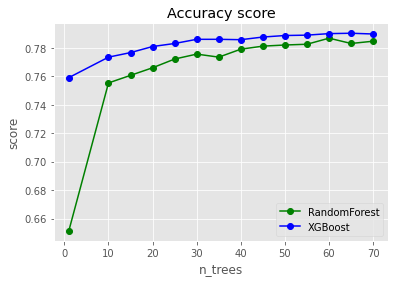

In [49]:
plt.plot(n_trees, rf_scoring.mean(axis = 1), 'g-', marker = 'o', label = 'RandomForest')
plt.plot(n_trees, xgb_scoring.mean(axis = 1), 'b-', marker='o', label = 'XGBoost')
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Accuracy score')
plt.legend(loc = 'lower right')

[back to outline](#outline)